In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
## Load the dataset
path = "../datasets/loan_data_set.csv"
loan_df = pd.read_csv(path)
loan_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
## Numeric columns or real value columns
numeric_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

## Categorical columns
categorical_cols = ['Gender', 'Married', 'Dependents', 'Education','Self_Employed', 'Loan_Amount_Term', 
                    'Credit_History', 'Property_Area', 'Loan_Status']

## Not required
not_req_cols = ["Loan_ID"] 

In [4]:
## drop the loan ID column and set an index for the dataframe
loan_df.drop(not_req_cols, axis=1, inplace=True)
loan_df.reset_index
loan_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Exploring Binary and Categorical data
    -> We can get the summary of a binary or categorical variable with a few categories by figuring out the proportion of 1s or the proportions of the important categories.
    -> Bar charts are a common visual tool for displaying a single categorical variable, Categories are listed on the x-axis 
       and frequesncies or proportions on the y-axis 
    -> In histogram, the bars are usually shown touching each other, with gaps indicating values that did not occur in the data.
    -> In a bar chart, the bars are shown seperate from one another(which indicates categories)
    -> Pie charts are an alternative to bar charts but are visually less informative.

In [5]:
## Plotting Bar plot 
## Here each row of the DataFrame is represented as a rectangular mark. 
# fig = px.bar(loan_df[categorical_cols],x="Education",y="Loan_Status", color="Gender")
# fig.show()
## For displaying smooth graphs use histogram function with categorical data
fig=px.histogram(loan_df,x="Education",color="Loan_Status")
fig.show()

### Mode
    -> The most commonly occuring category or value in a dataset.

### Expected Value
    -> A special type of categorical data is data in which the categories represent or can be mapped to a numeric value,
       this gives an average value based on a category's probability of occurance.
    -> It is a form of weighted mean, in which weights are probabilities.
    -> The expected value is calculated as follows:
       1. Multiply each outcome by probability of its occurance.
       2. Sum these values

#### Further Reading
     Misleading Graphs - https://en.wikipedia.org/wiki/Misleading_graph

### Correlation
    -> The word correlation in statistics is used to denote association between two quantitative variables.
    -> It also assumes that the association is linear, that one variable increases or decreases a fixed amount
       for a unit increase or decrease in the other.

#### Correlation coefficient
     -> A metric that measures the extent to which numeric variables are associated with one another(ranges from -1 to +1)
     -> The degree of association is measured by a correlation coefficient, denoted by r.
     -> It is sometimes called Pearson’s correlation coefficient after its originator and is a measure of linear association.
     -> When one variable increases as the other increases the correlation is positive; when one decreases as the other increases it is negative.

     To compute Perason's correlation coefficient:
     1. (Deviations from Variable1 x Deviations from Variable 2)/ Product of Standard Deviations
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{(n - 1)s_xs_y}
$$
OR
$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt({\sum (x_i - \bar{x})^2\sum(y_i - \bar{y})^2})}
$$
### Note
    -> Like mean and standard deviation, the correaltion coefficient is sensitive to outliers in the data.

#### Further Reading
     Statistics 4th edition by David Freedman, Robert Pisani and Roger Purves for discussion of correlation

### Heatmaps
    -> Heatmap is a matrix representation of the variables, which is coloured based on the intensity of the value.
    -> It provides an excellent visual tool for comparing various entities.
    -> It can also be used to check the correlation between different variables.

### References
    https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/
    https://www.geeksforgeeks.org/display-the-pandas-dataframe-in-heatmap-style/
    https://seaborn.pydata.org/generated/seaborn.heatmap.html
    https://www.geeksforgeeks.org/seaborn-heatmap-a-comprehensive-guide/

In [6]:
loan_df[numeric_cols].corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount
ApplicantIncome,1.000000,-0.116605,0.570909
CoapplicantIncome,-0.116605,1.000000,0.188619
LoanAmount,0.570909,0.188619,1.000000


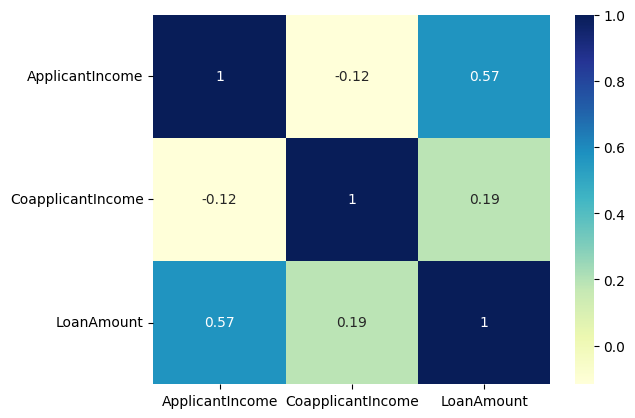

In [7]:
## Creating a heatmap using seaborn
## To map correlation matrix as heatmap, pass the correlation matrix as data and not a dataframe
sns.heatmap(data=loan_df[numeric_cols].corr(),cmap="YlGnBu", annot=True)
plt.show()

### Scatter Plots
    -> The standard way to visualize the relationship between 2 measured data variables is with a scatterplot.
    -> The x axis represents one variable and y axis another, and each point on the graph is a record

### References
    ### Go through these in detail later
    matplotlib - https://realpython.com/visualizing-python-plt-scatter/
                 https://www.geeksforgeeks.org/matplotlib-pyplot-scatter-in-python/
    Plotly - https://plotly.com/python/line-and-scatter/

In [8]:
## Plotting a scatterplot
scatter_fig = px.scatter(
                    x="LoanAmount", 
                    y="ApplicantIncome",
                    color="Loan_Status",
                    data_frame=loan_df)
scatter_fig.show()

## Exploring Two or More Variables
      -> Also called as bivariate (two variables) and mulitvariate (more than two variables) analysis.
      -> The appropriate type of bivarite or multivariate analysis depends on the nature of the data - numeric v/s categorical

### Hexagonal Binning and Contours (Plotting Numeric v/s Numeric Data)
    -> Scatterplots are fine when there is a realtively small number of data values.
    -> For datasets that have aa lot of records(hundreds of thousands or millions) or even >500, a scatterplot will be too dense. It will appear as a large dark cloud
    -> Therefore the data is grouped into hexagonal bins and plotted the hexagons with a colour indicating the number of records in that bin

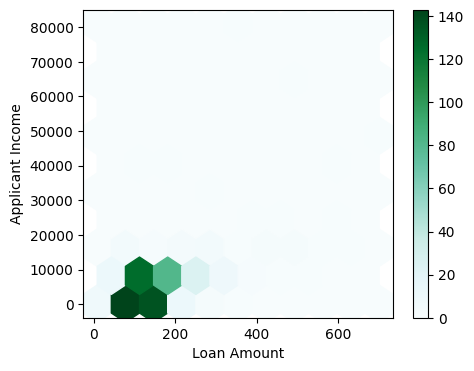

In [15]:
## Pandas has a dataframe method hexbin 
## It is not useful in this context as the records or data points are very less
ax = loan_df.plot.hexbin(x="LoanAmount",y="ApplicantIncome", gridsize=10, figsize=(5,4))
ax.set_xlabel("Loan Amount")
ax.set_ylabel("Applicant Income")
plt.show()

### Two Categorical Variables

#### Contingency Table
     -> A table or tally of counts between two or more categorical variables
     -> Contingency tables can look only at counts or they can also include column and total percentages.
     -> Contingency tables classify outcomes for one variable in rows and the other in columns. The values at the row and column intersections are frequencies for each unique combination of the two variables.
     -> In Excel pivot tables are used to achieve this.
     -> IN python pandas we can use both pivot tables and crosstab functions to create a contingency table. pivot_table has more features so here we will use it. 

In [28]:
## USing crosstab function in pandas
## margins = True - for total counts
print("Table generated from crosstab function") 
crosstab = pd.crosstab(loan_df["Gender"],loan_df["Loan_Status"],margins=True)
crosstab


Table generated from crosstab function


Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


### Categorical and Numeric Data
    -> Box plots can be used to compare a numerical variable against a categorical variable.
    -> for eaxample see notebook - Exxploring Data Distribution (Box plots)
    -> The libraries that plot this graph can also plot it by category

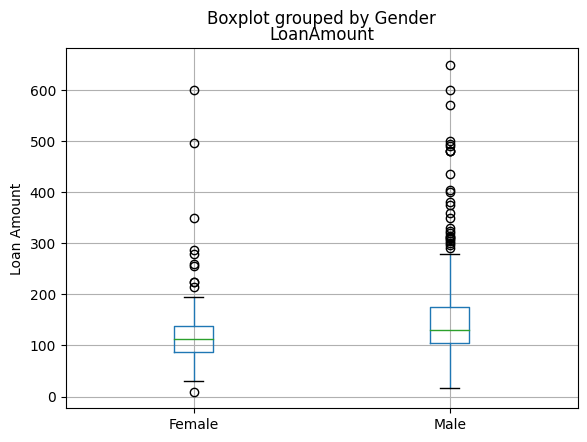

In [30]:
## Here is an example using pandas
box_stats = loan_df.boxplot(by="Gender",column="LoanAmount")
box_stats.set_xlabel("")
box_stats.set_ylabel("Loan Amount")
plt.show()
## This data shows that men have applied for higher amount of loan then women

### Violin Plot
    -> A violin plot is an enhancement to the box plot and plots the density estimate with the density on y-axis.
    -> It is a hybrid of a box plot and kernel density plot which shows peak in the data.
    -> Unlike a box plot that can only show summary statistics, violin plots can depict summary statistics and the density of 
       each variable.
    -> It can also show nuamces in a distribution that aren't perceptible in a boxplot.
    -> Box plot clearly shows more outliers in the data.

With quartile
without quartile


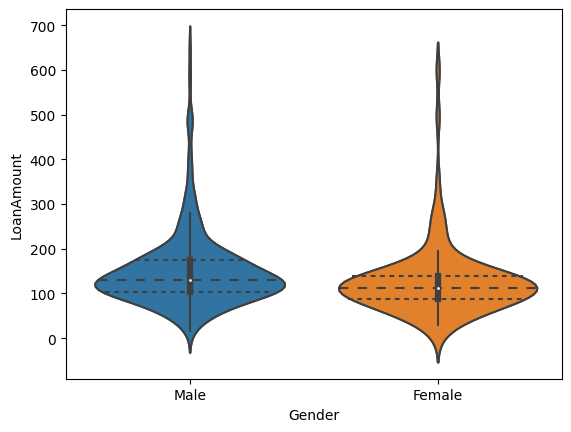

In [35]:
## Plotting a violin plot using seaborn
#"With quartile" 
## Overlapping graphs
vln_plot = sns.violinplot(data=loan_df, x="Gender",y="LoanAmount", inner="quartile")
#without quartile"
vln_plain = sns.violinplot(data=loan_df, x="Gender",y="LoanAmount")

### Further Reading
    -> Read and understand Conditioning variables